In [20]:
%pylab inline
import numpy as np
import scipy
from scipy import signal
import os
import csv
from my_logger import log_progress

matplotlib.rcParams['savefig.dpi'] = 120
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': u'--'})

sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy')
sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy/libbootstrap')

import libbootstrap.spectralmodel as spectralmodel
import scipy
import libbootstrap.spectra_generator as spectra_generator

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from libs.models import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['interactive', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [21]:
def file_picker(_data_file):
    global data_file
    data_file = _data_file
    print(data_file)

def __plot_inverted(rrs_num=1):
    
    _label = '$a_\phi = ' + str("{:.3f}").format(synth_data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str("{:.3f}").format(synth_data[rrs_num].x[2]) + '$' + \
    '\n $b_{bp} = ' + str("{:.3f}").format(synth_data[rrs_num].x[1]) + '$'

    model_rrs = dc.func(synth_data[rrs_num].x)
    measured_rrs = dc.rrs[rrs_num, :]

    pylab.plot(wavelengths, model_rrs , '--', alpha = 0.75, label=_label) #color= '0.75'

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str("{:.3e}").format(rms) + '$')
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    pylab.legend(frameon=True, fancybox=True, shadow=True, loc=2)
    pylab.title(sitename)
    print(synth_data[rrs_num])

    pylab.show()

class globs:
    debug = False

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def plot_inverted(rrs_num=1):
    
    _label = '$a_\phi = ' + str("{:.3f}").format(data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str("{:.3f}").format(data[rrs_num].x[2]) + '$' + \
    '\n $b_{bp} = ' + str("{:.3f}").format(data[rrs_num].x[1]) + '$'

    model_rrs = dc.func(data[rrs_num].x)
    measured_rrs = dc.rrs[rrs_num, :]

    pylab.plot(wavelengths, model_rrs , '--', alpha = 0.75, label=_label) #color= '0.75'

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str("{:.3e}").format(rms) + '$')
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    pylab.legend(frameon=True, fancybox=True, shadow=True, loc=2)
    pylab.title(sitename)
    print(data[rrs_num])

    pylab.show()

In [22]:
options={'ARM': '0_ARM_14Nov11_1212.csv',
         'BLA': '0_BLA_14Nov11_1146.csv',
         'HEA': '0_HEA_14Nov11_1232.csv', 
         'KIN': '0_KIN_14Nov11_1506.csv',
         'MAY': '0_MAY_14Nov11_1409.csv',
         'NAR': '0_NAR_14Nov11_1257.csv',
         'NIL': '0_NIL_14Nov11_1320.csv',
         'RON': '0_RON_14Nov11_1441.csv',
         'STJ': '0_STJ_14Nov11_1350.csv',
         'SUC': '0_SUC_14Nov11_1527.csv'}

interact(file_picker, _data_file=options)

0_NAR_14Nov11_1257.csv


<function __main__.file_picker>

In [23]:
print(data_file)
path, filename = os.path.split(data_file)

sitename =  options.keys()[options.values().index(filename)]
print(sitename)

data_directory = './inputs/swan_data'
image_directory = './img'
#data_file = '0_BLA_14Nov11_1146.csv'
data_file = os.path.join(data_directory, data_file)
print(data_file)
rrs = np.genfromtxt(data_file, delimiter=',')

0_NAR_14Nov11_1257.csv
NAR
./inputs/swan_data/0_NAR_14Nov11_1257.csv


In [24]:
window = 5
poly = 2

start = 5
stop = 2

num_realizations = 1200

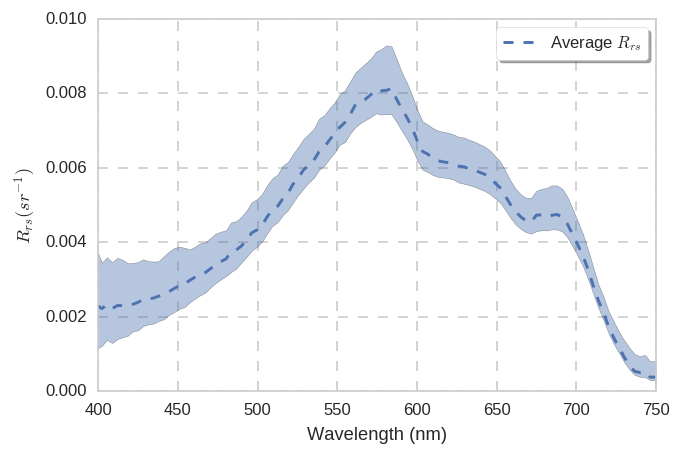

In [25]:
min_rrs = np.amin(rrs[start:stop * -1,:], axis=0)
max_rrs = np.amax(rrs[start:stop * -1,:], axis=0)
mean_rrs = np.median(rrs[start:stop * -1,:], axis=0)

pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)
pylab.plot(rrs[0,:], mean_rrs, '--', label='Average $R_{rs}$')
pylab.xlim([400, 750])
pylab.legend(frameon=True, fancybox=True, shadow=True)
pylab.xlabel('Wavelength (nm)')
pylab.ylabel('$R_{rs}(sr^{-1})$')
#pylab.ylim([0, 0.005])

'08/15/2016 12:56:16 PM' :: libbootstrappy :: INFO :: Reading :: ./inputs/swan_data/0_NAR_14Nov11_1257.csv


(400, 750)

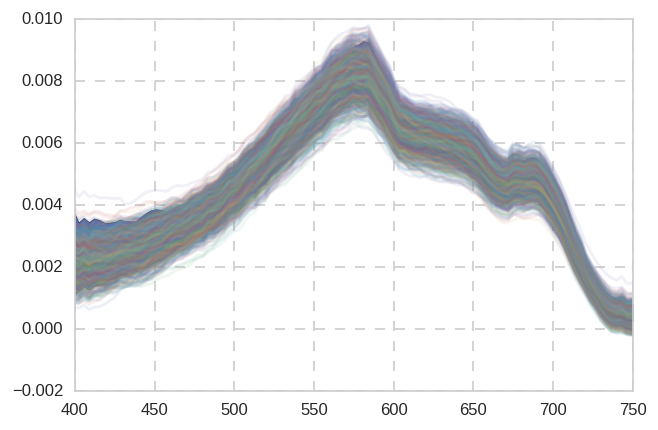

In [26]:
sm = spectralmodel.BuildSpectralModel(data_file)

#for row in sm.Rrs:
#    pylab.plot(sm.wave, row)


sm._detrend()
sm._calc_std_delta_Rrs()
sm._calc_normalised_difference_Rrs()
sm._calc_power_spectrum()

sg = spectra_generator.GenerateRealisation(sm, num_realizations)
rn = sg._gen_random_numbers(num_realizations)
N = sg._calc_fft_random_numbers()
Y = sg._calc_rand_powerspectrum()
y = sg._calc_inv_rand_powerspectrum() # lowercase y
y_hat = sg._calc_normalised_difference_inv_rand_powerspectrum()
z = sg._calc_z()
# pinch an Rrs from sm 
#Rrs_1 = Rrs[50, :] #sm.mean_Rrs  This isa spoof!

# Generate realisations from it.
#print(Rrs)
Rrs = sg.gen_Rrs()

for row in Rrs:
    pylab.plot(sm.wave, row, alpha= 0.1)
    
pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=1)
pylab.xlim([400, 750])
#pylab.ylim([0, 0.005])

   status: 0
  success: True
     njev: 39
     nfev: 195
 hess_inv: array([[  1.05574767e+04,   6.57721415e+02,  -3.09345951e+03],
       [  6.57721415e+02,   4.81108137e+01,  -5.02895574e+00],
       [ -3.09345951e+03,  -5.02895574e+00,   7.09493117e+03]])
      fun: 9.397270708600142e-06
        x: array([ 0.11783588,  0.09891634,  1.7226008 ])
  message: 'Optimization terminated successfully.'
      jac: array([  6.91355808e-08,  -4.32267132e-06,   3.28911938e-07])


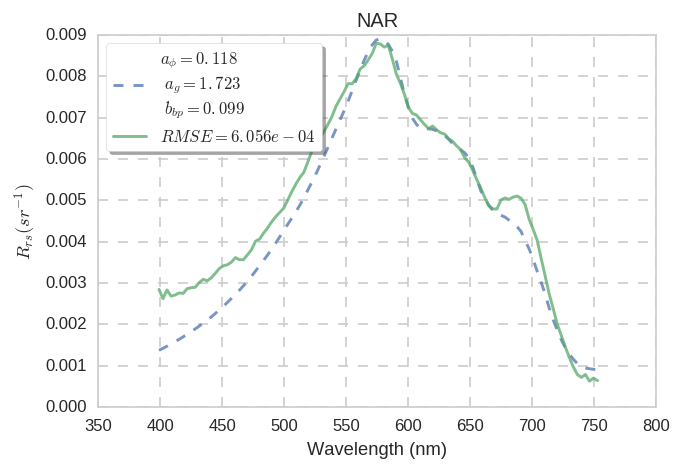

In [27]:
wavelengths = rrs[0, :]

dc = HopeDeep(wavelengths);
dc.rrs = np.genfromtxt(data_file, delimiter=',')
dc.read_all_iops_from_files();

data = dc.run(num_iters=1);

interact(plot_inverted,rrs_num=(1, len(data)))
print(data_file)

   status: 0
  success: True
     njev: 40
     nfev: 200
 hess_inv: array([[ 9228.31904945,   516.00139833, -2309.99580812],
       [  516.00139833,    36.35524754,    83.13886635],
       [-2309.99580812,    83.13886635,  7814.34503128]])
      fun: 7.477515619121445e-06
        x: array([ 0.01768933,  0.08536711,  1.8537441 ])
  message: 'Optimization terminated successfully.'
      jac: array([  2.52647055e-07,  -3.31062904e-06,   1.26393161e-07])


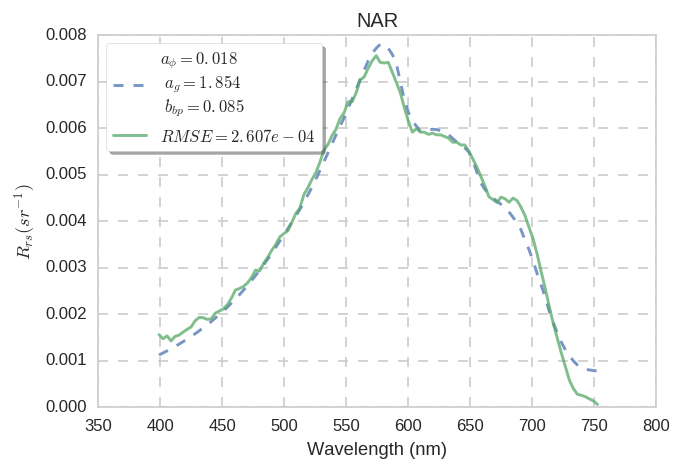

./inputs/swan_data/0_NAR_14Nov11_1257.csv


In [28]:
wavelengths = rrs[0, :]

dc = HopeDeep(wavelengths);
dc.rrs = np.genfromtxt("./inputs/rrs_files/" + sitename + "synthRrs.csv", delimiter=',')
dc.read_all_iops_from_files();

synth_data = dc.run(num_iters=1);

interact(__plot_inverted,rrs_num=(1, len(synth_data)))
print(data_file)